<a href="https://colab.research.google.com/github/RylieWeaver9/Machine-Learning/blob/main/MNist%20w/%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW Project 5 Exercises 9/10 Modified**

## Setup

In [5]:
# importing
import sys
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [6]:
# plot formatting
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
# path to save figures
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
# fetch dataset
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# **9.**

## Compare dataset size to accuracy with 4 models (random forest/stochastic gradient descent) (reduced/regular)

In [9]:
# load data
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [10]:
# initialize arrays to store dataset size and accuracies
data_num = []
rnd_regular = []
rnd_pca = []
sgd_regular = []
sgd_pca = []


for i in range(6):
  # size of training data
  size = (i+1)*10000

  # define training data
  X_train = mnist.data[:size]
  y_train = mnist.target[:size]
  # make PCA data
  pca = PCA(n_components=0.95)
  X_train_reduced = pca.fit_transform(X_train)
  X_test_reduced = pca.transform(X_test)

  # train random forest
  rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
  rnd_clf.fit(X_train, y_train)
  # test random forest
  y_pred1 = rnd_clf.predict(X_test)
  acc1 = accuracy_score(y_test, y_pred1)

  # train pca random forest
  rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
  rnd_clf_with_pca.fit(X_train_reduced, y_train)
  # test random forest
  y_pred2 = rnd_clf_with_pca.predict(X_test_reduced)
  acc2 = accuracy_score(y_test, y_pred2)

  # train sgd
  sgd_clf = SGDClassifier(random_state=42)
  sgd_clf.fit(X_train, y_train)
  # test sgd
  y_pred3 = sgd_clf.predict(X_test)
  acc3 = accuracy_score(y_test, y_pred3)

  # train pca sgd
  sgd_clf_with_pca = SGDClassifier(random_state=42)
  sgd_clf_with_pca.fit(X_train_reduced, y_train)
  # test pca sgd
  y_pred4 = sgd_clf_with_pca.predict(X_test_reduced)
  acc4 = accuracy_score(y_test, y_pred4)

  # make arrays of accuracy/data size to plot
  print(i+1, acc1, acc2, acc3, acc4)
  rnd_regular = np.append(rnd_regular, acc1)
  rnd_pca = np.append(rnd_pca, acc2)
  sgd_regular = np.append(sgd_regular, acc3)
  sgd_pca = np.append(sgd_pca, acc4)
  data_num = np.append(data_num, i+1)

1 0.9504 0.9123 0.8465 0.7949
2 0.9568 0.9354 0.8841 0.8501
3 0.9638 0.9422 0.872 0.879
4 0.9661 0.9438 0.8669 0.8952
5 0.968 0.948 0.8677 0.8888
6 0.9705 0.9481 0.874 0.8959


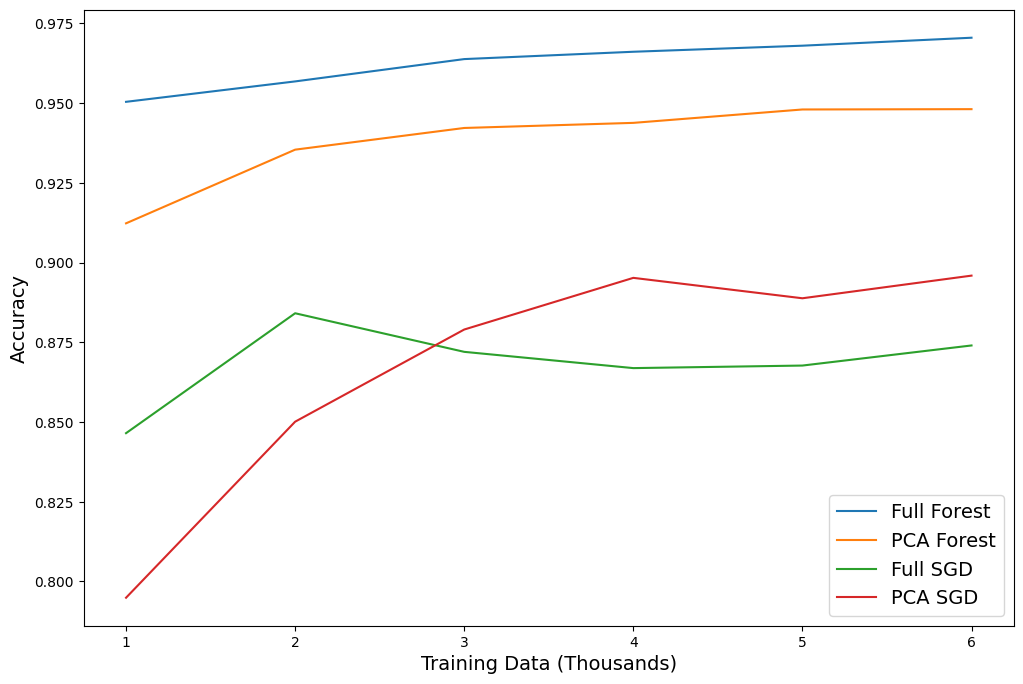

In [12]:
# plot the accuracy vs training data size for various modelsov

plt.figure(figsize=(12,8))

plt.plot(data_num, rnd_regular, label='Full Forest')
plt.plot(data_num, rnd_pca, label='PCA Forest')
plt.plot(data_num, sgd_regular, label ='Full SGD')
plt.plot(data_num, sgd_pca, label='PCA SGD')

plt.xlabel('Training Data (Thousands)')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Random forest outperforms SGD regardless if the dataset is PCA reduced or not. As we'd expect, the full forest has better accuracy thean the PCA reduced forest. However, directly contrary to what we'd expect, PCA reduced SGD outperforms the full SGD (very odd). Maybe this is a because reducing with PCA helps reduce overfitting?

# **10.**

## Setup

In [13]:
# importing
from mpl_toolkits.mplot3d import axes3d
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
# load data
X_train = mnist.data[60000:]
y_train = mnist.target[60000:]

In [15]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

## Various reductions and plotting

### *   Plotting uses 'ax.scatter' instead of 'plt.scatter' for 3 dimensions. Must first define 'ax' and import 3d plotting to do this.
### *   Can rotate view with 'ax.view_init'
### * I prefer axes on because I believe it helps visualize the data




In [16]:
tsne = TSNE(n_components=3, init="random", learning_rate="auto", random_state=42)
X_reduced = tsne.fit_transform(X_sample)

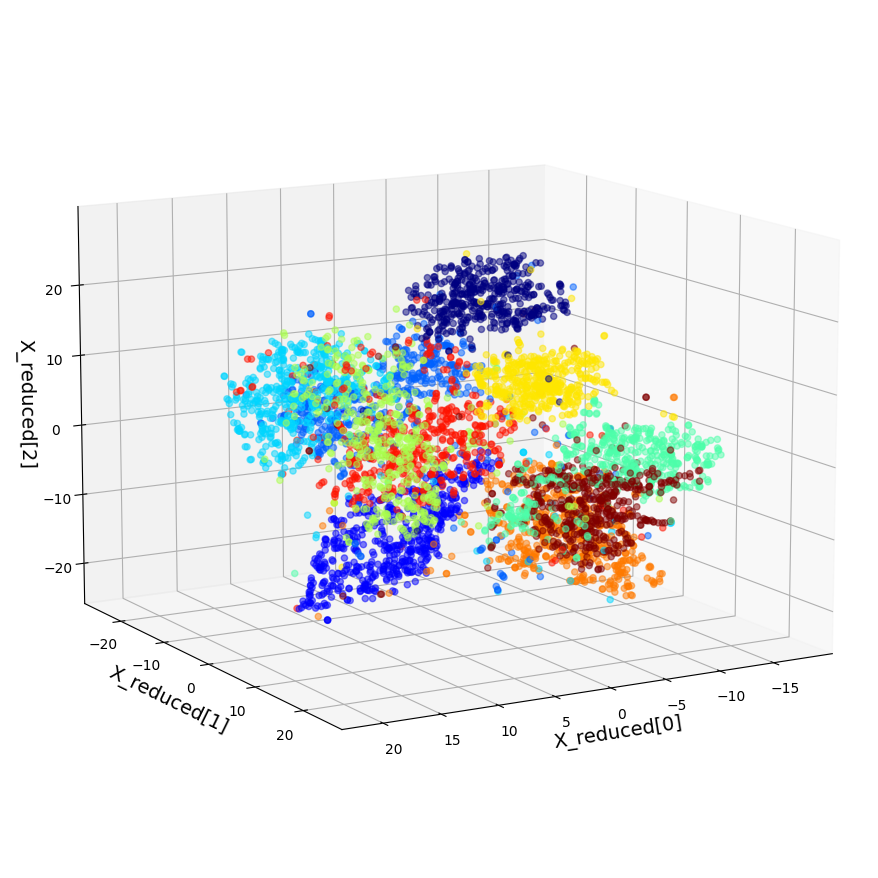

In [17]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')

x = X_reduced[:, 0]
y = X_reduced[:, 1]
z = X_reduced[:, 2] 

ax.scatter3D(x, y, z, c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)

ax.view_init(elev=12, azim=60)

ax.set_xlabel('X_reduced[0]')
ax.set_ylabel('X_reduced[1]')
ax.set_zlabel('X_reduced[2]')
plt.tight_layout()
plt.show()

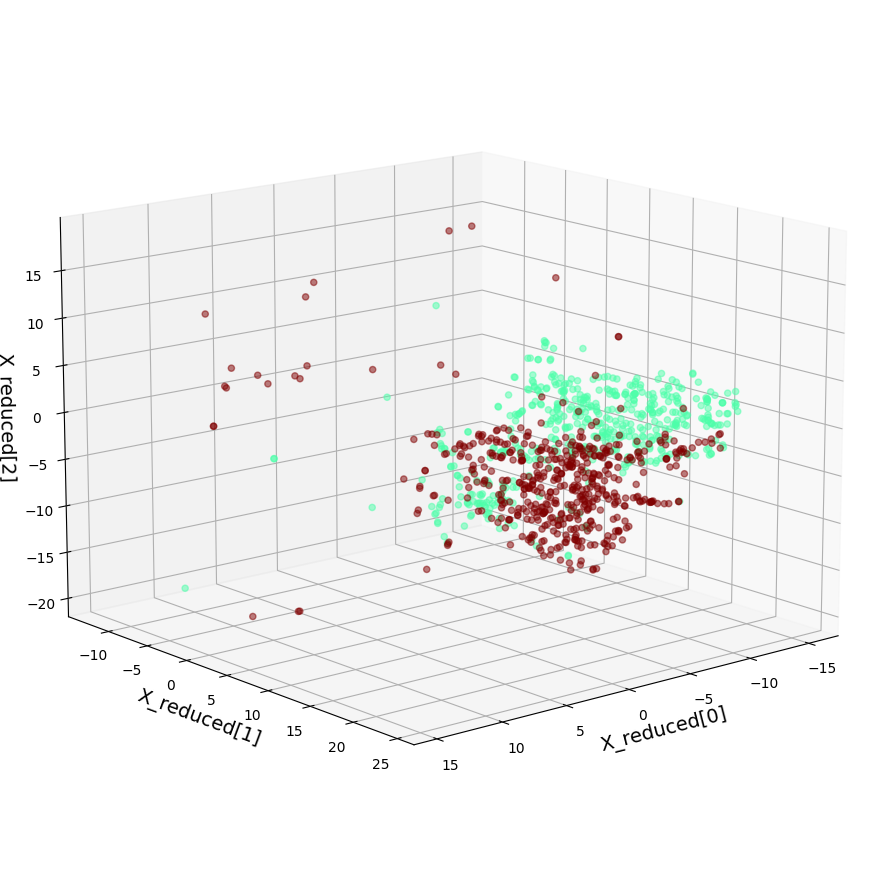

In [18]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')

cmap = plt.cm.jet
# compare subset of digits
for digit in ('4', '9'):
    ax.scatter3D(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1], X_reduced[y_sample == digit, 2], c=[cmap(float(digit) / 9)], alpha=0.5)

ax.view_init(elev=14, azim=50)

ax.set_xlabel('X_reduced[0]')
ax.set_ylabel('X_reduced[1]')
ax.set_zlabel('X_reduced[2]')
plt.tight_layout()
plt.show()

In [19]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=3, learning_rate="auto", random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

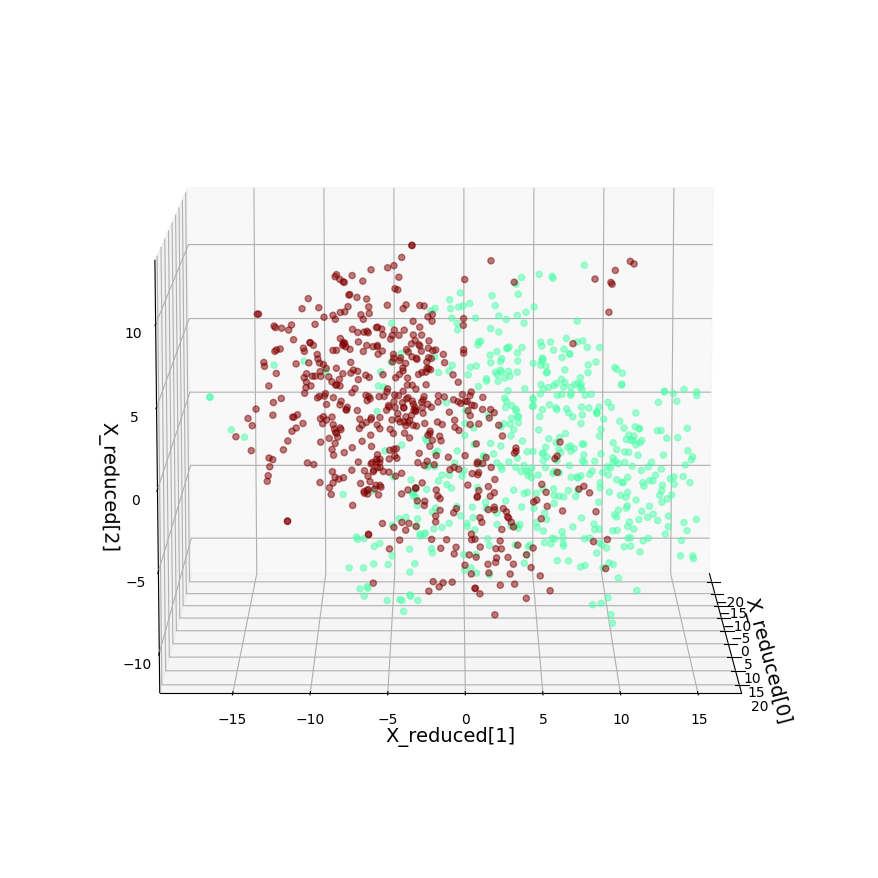

In [20]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')

for digit in ('4', '9'):
    ax.scatter3D(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                X_subset_reduced[y_subset == digit, 2],
                c=[cmap(float(digit) / 9)], alpha=0.5)
    
ax.view_init(elev=10, azim=0)
    
ax.set_xlabel('X_reduced[0]')
ax.set_ylabel('X_reduced[1]')
ax.set_zlabel('X_reduced[2]')
plt.tight_layout()
plt.show()

## Make 'plot_digits' function to call for various reductions

In [21]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10., 10.]])
    # The rest should be self-explanatory
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection = '3d')
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        ax.scatter3D(X_normalized[y == digit, 0], X_normalized[y == digit, 1], X_normalized[y == digit, 2],
                    c=[cmap(float(digit) / 9)], alpha=0.5)

    ax.view_init(elev=10, azim=45)
    ax.set_xlabel('X_reduced[0]')
    ax.set_ylabel('X_reduced[1]')
    ax.set_zlabel('X_reduced[2]')

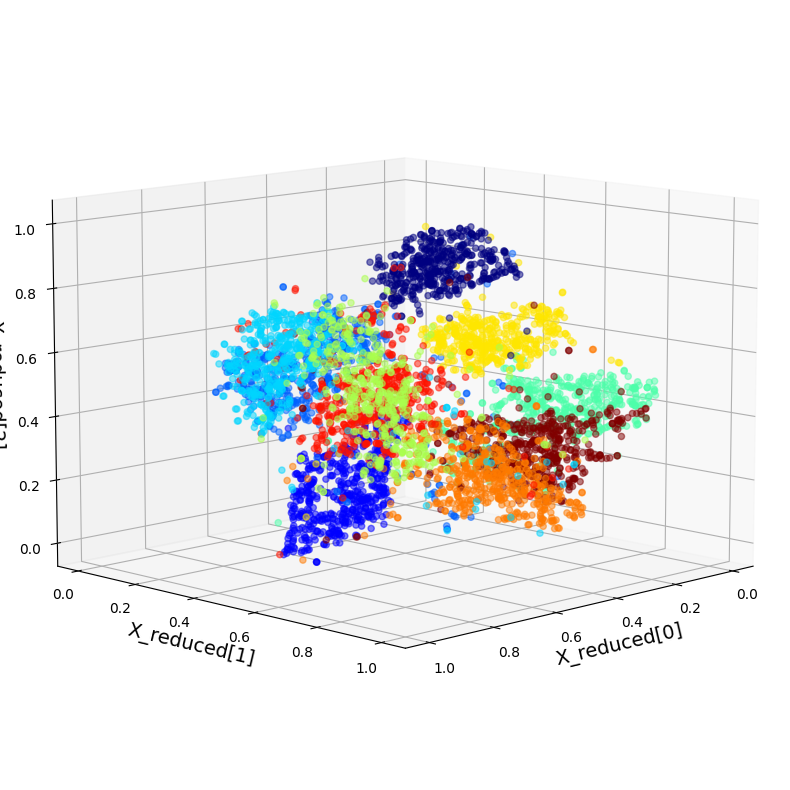

In [22]:
plot_digits(X_reduced, y_sample)

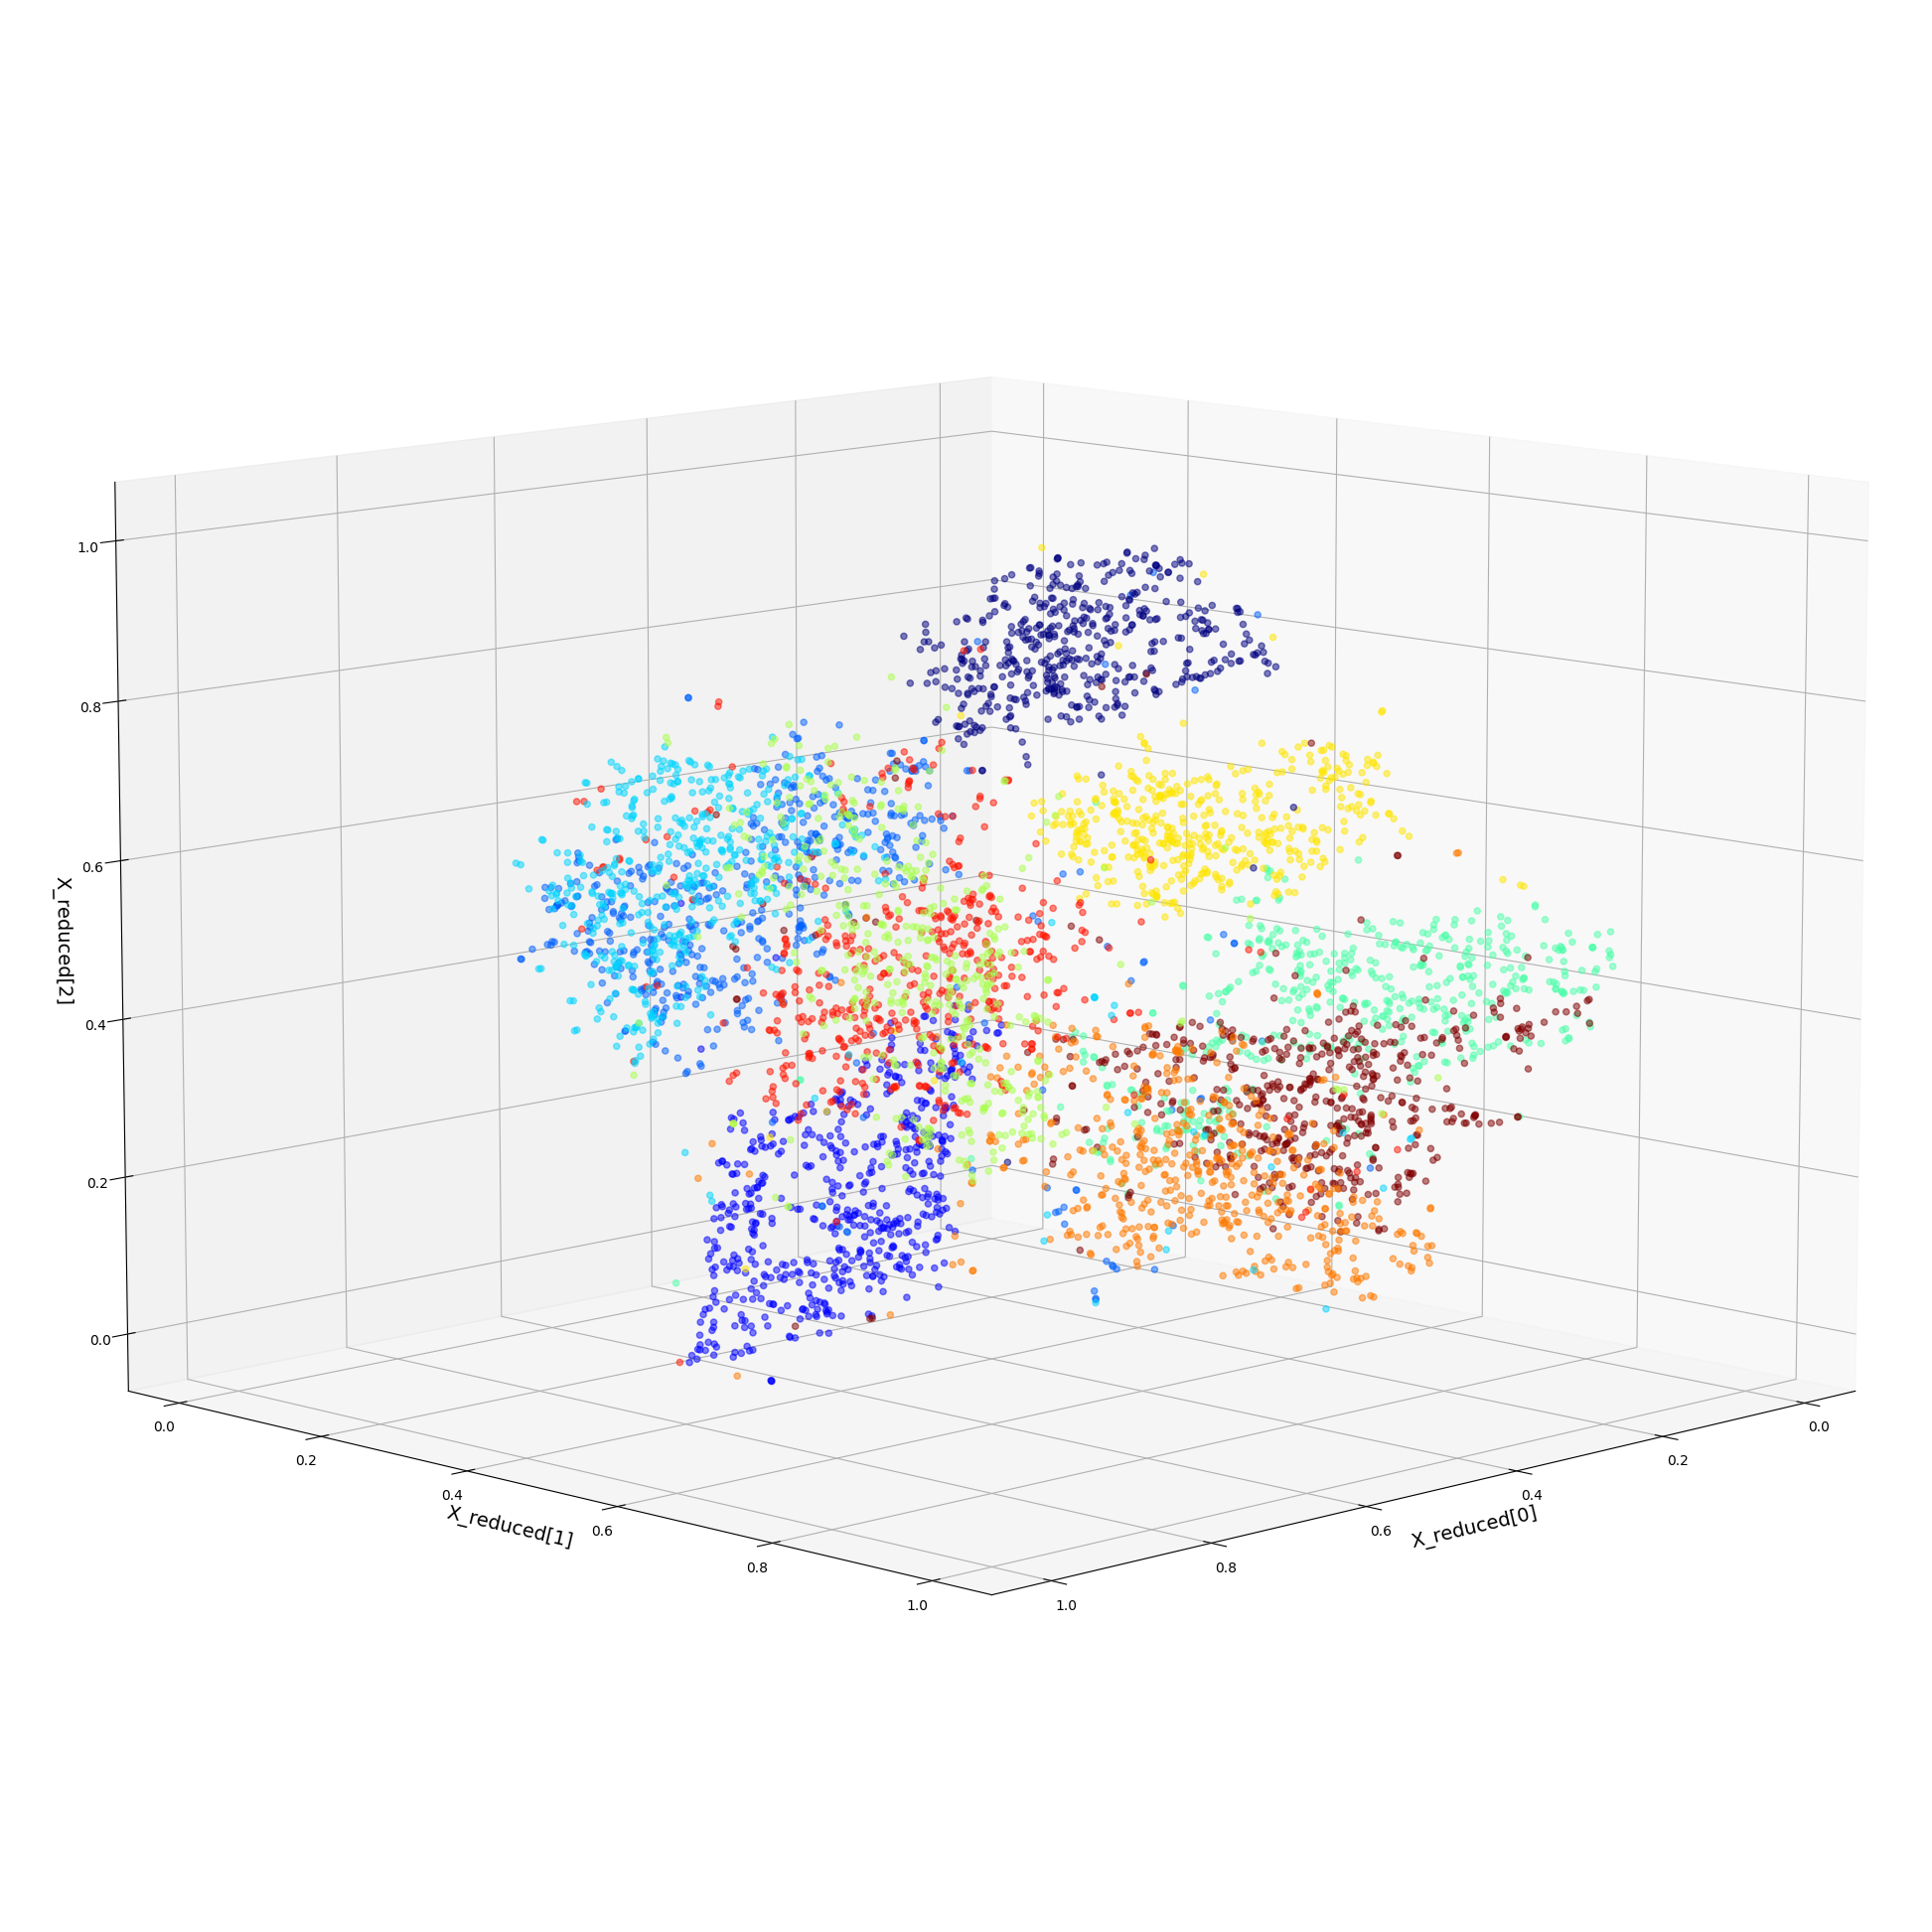

In [23]:
# zoomed in
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))

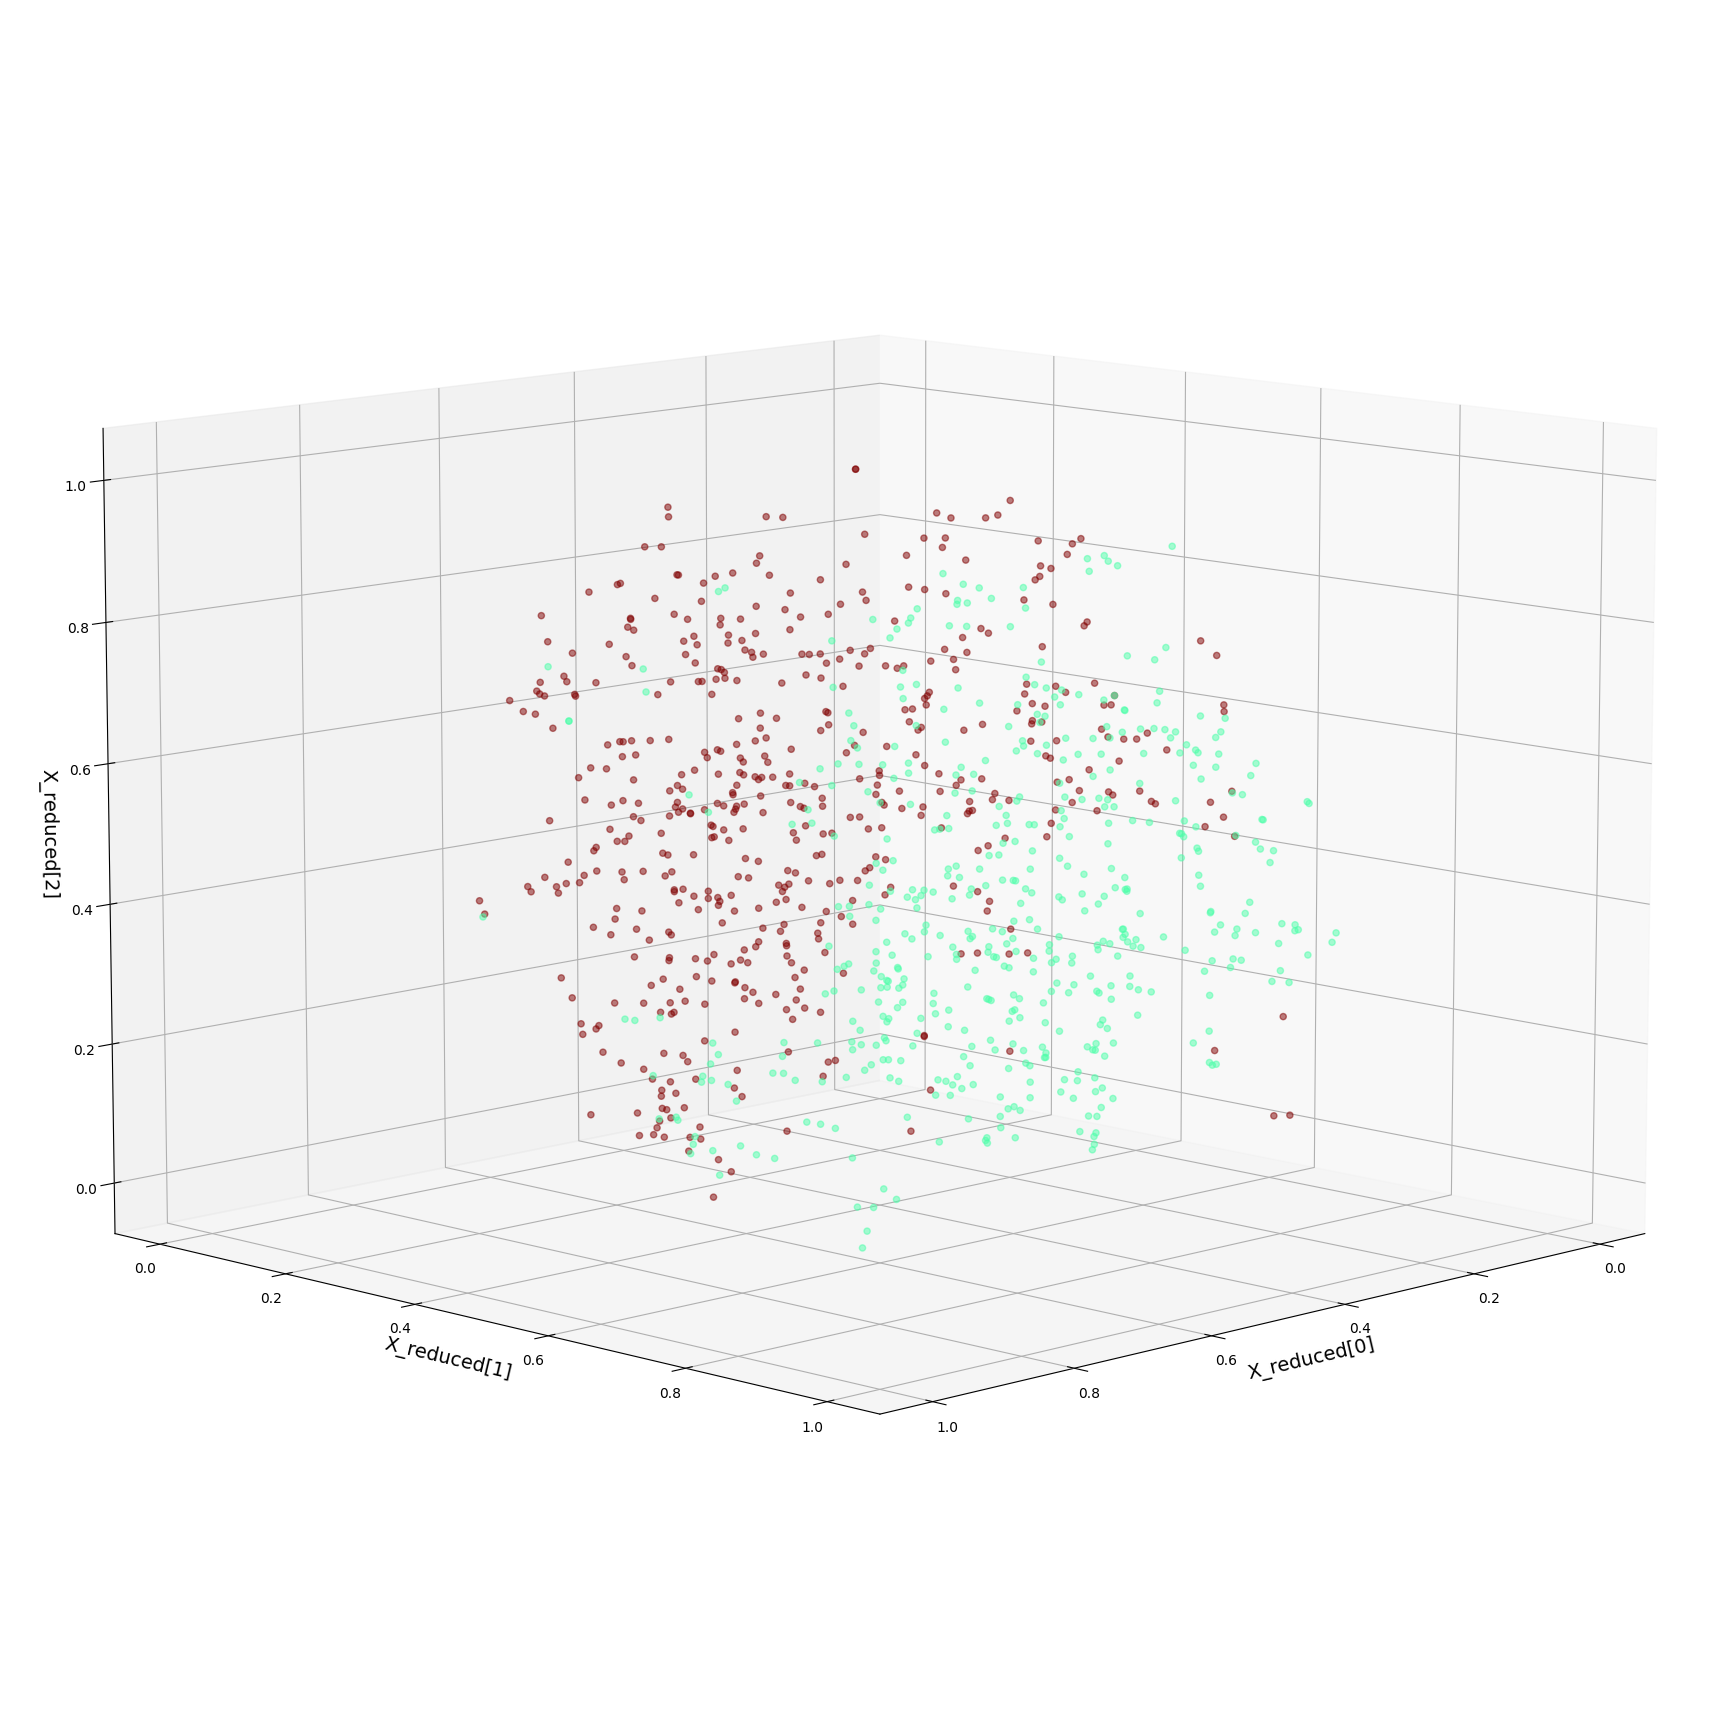

In [24]:
# compare subset of digits zoomed in
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

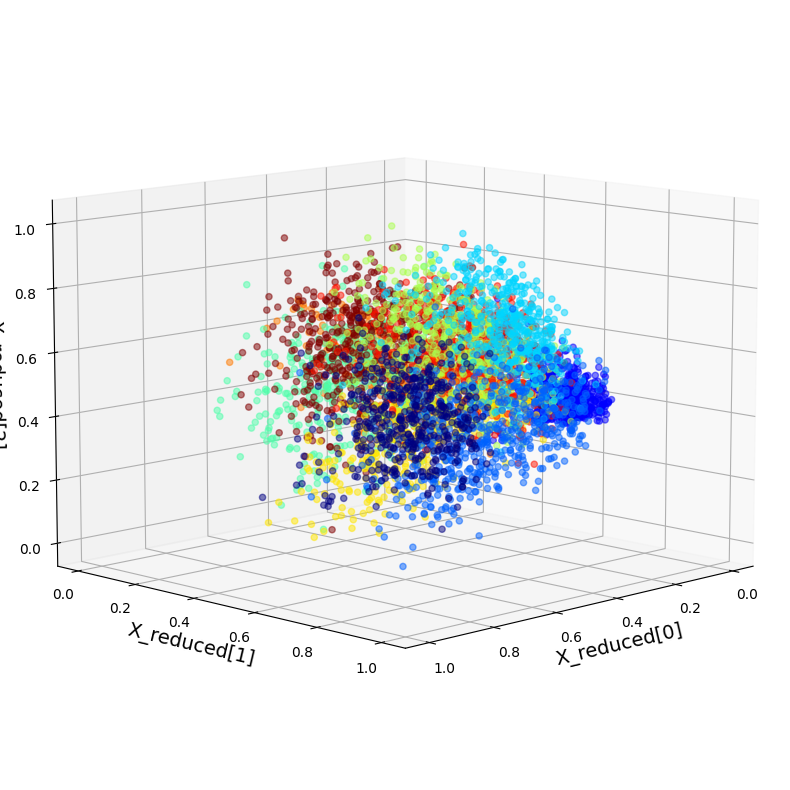

In [25]:
pca = PCA(n_components=3, random_state=42)
X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

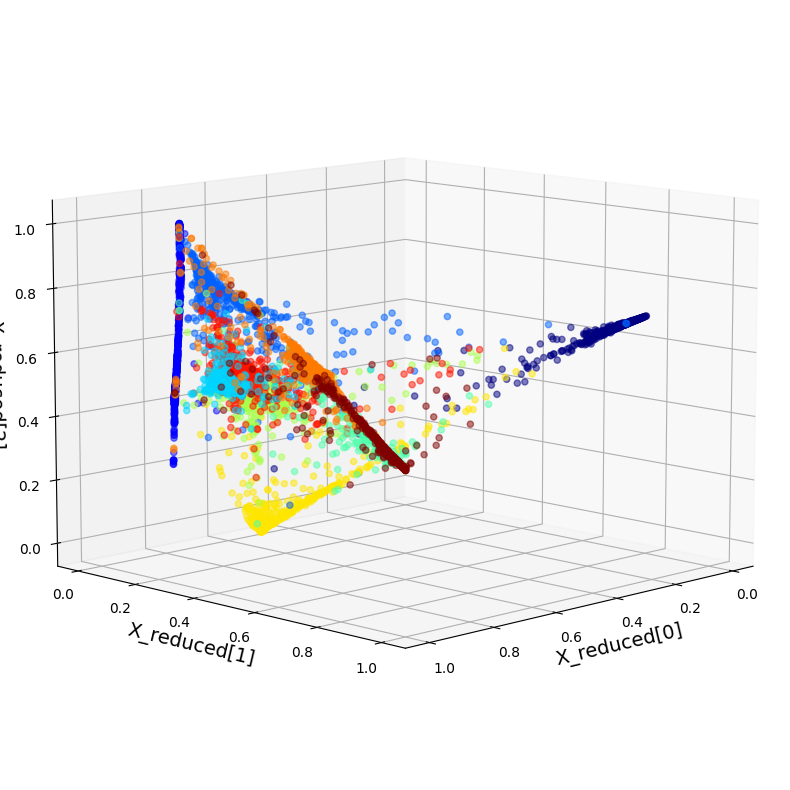

In [26]:
lle = LocallyLinearEmbedding(n_components=3, random_state=42)
X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

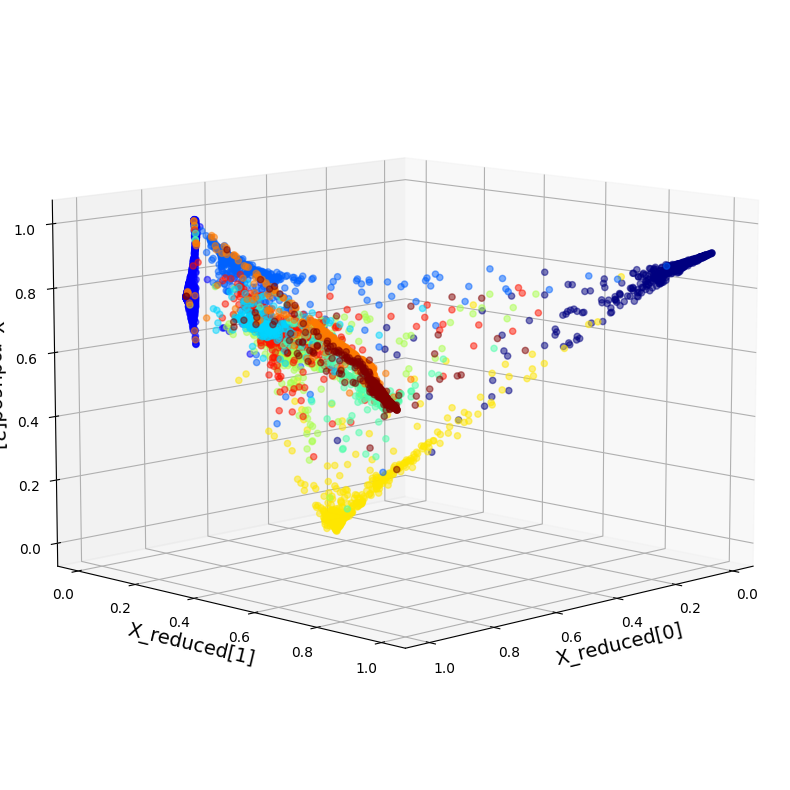

In [27]:
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=3, random_state=42))

X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


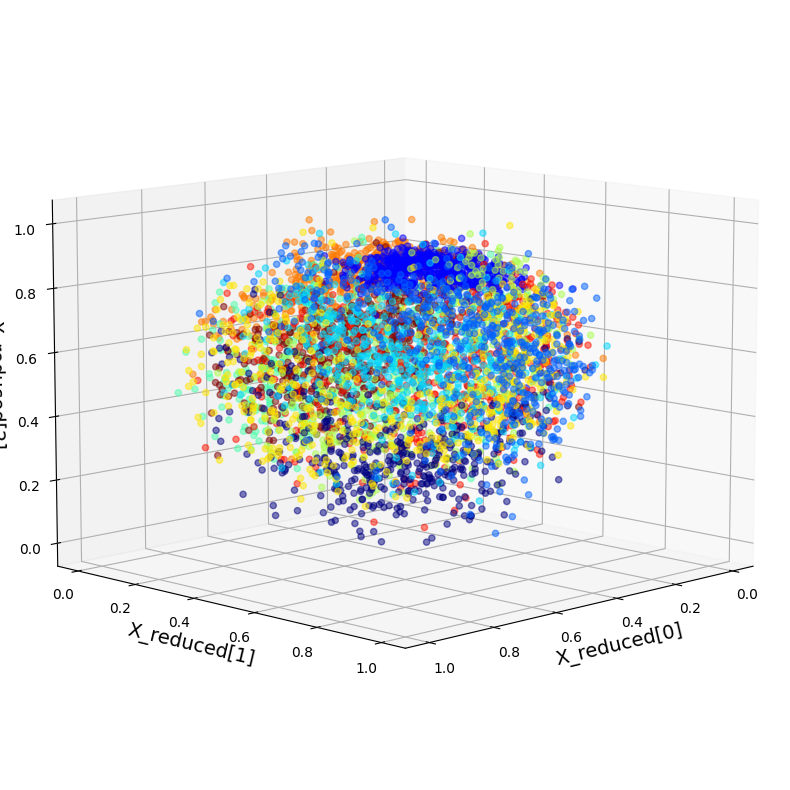

In [28]:
X_mds_reduced = MDS(n_components=3, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


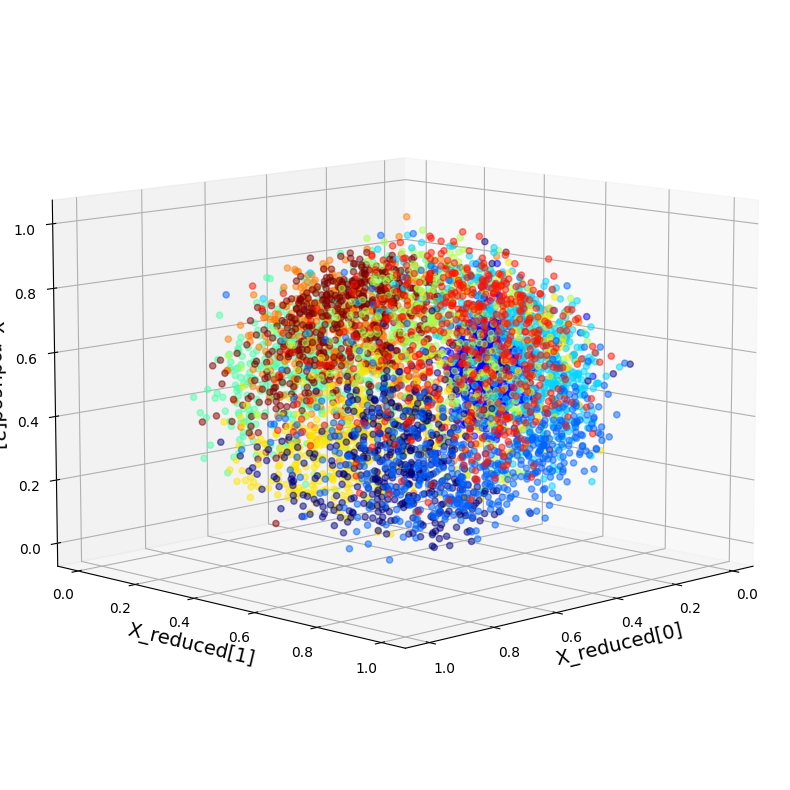

In [29]:
pca_mds = make_pipeline(PCA(n_components=0.95, random_state=42),
                        MDS(n_components=3, random_state=42))

X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

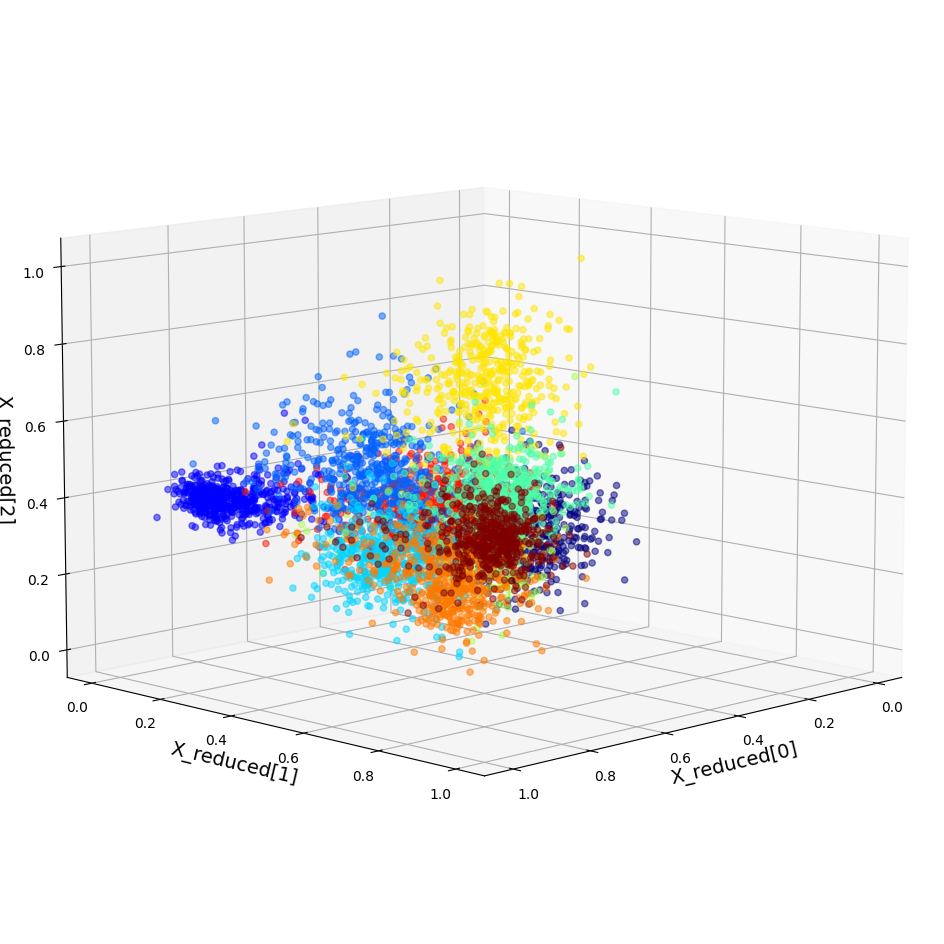

In [30]:
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_reduced = lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample, figsize=(12, 12))
plt.show()